ROC Curves of SEE Classify HOF

In [6]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [7]:
# Returns [training_fitnes, algo_vec]
import re
# convert strings into algo
from see.classifiers import Classifier

def extract_best(file):
    # figure out last generation
    file = open(file, "r")
    best = None
    for line in file:
        pattern = "#BEST "
        if re.search(pattern, line):
            best = line
    print(best)
    best = best.split(" ", 1)[1]
    return eval(best)

def algo_vec_to_clf(algo_vec):
    from see.classifiers import Classifier
    if(isinstance(algo_vec, str)):
        algo_vec = eval(algo_vec)
    clf = Classifier(paramlist=algo_vec).create_clf()
    return clf

def extract_random_state(file):
    file = open(file, "r")

    random_state = None

    for line in file:

        pattern = "# random_state int:"

        if re.search(pattern, line):
            random_state = int(line.split(":")[1])

    file.close()
    return random_state

In [8]:
# filepath_templates = [
#     "../10hours_pipeline/cancer/slurm-45487731_{}.out",
#     "../10hours_pipeline/phoneme/slurm-45487808_{}.out",
#     "../10hours_pipeline/moons/slurm-45487773_{}.out",
#     "../10hours_pipeline/circles/slurm-45487768_{}.out",
#     "../10hours_pipeline/lin_sep/slurm-45487771_{}.out",
# ]
filepath_templates = [
    "../10hours_pipeline/cancer/slurm-45595638_{}.out",
    "../10hours_pipeline/phoneme/slurm-45595711_{}.out",
    "../10hours_pipeline/moons/slurm-45595710_{}.out",
    "../10hours_pipeline/circles/slurm-45595708_{}.out",
    "../10hours_pipeline/lin_sep/slurm-45595709_{}.out",
]

In [9]:
def extract_data(file):
    rs = extract_random_state(file)
    [training_fitness, algo_vec] = extract_best(file)
    clf = algo_vec_to_clf(algo_vec)
    return [rs, training_fitness, clf]

In [10]:
file_lists = [(lambda s: map(lambda i: s.format(i+1), [*range(30)]))(template) for template in filepath_templates]
file_lists = [list(m) for m in file_lists]

In [11]:
best_matrix = [map(extract_data, fl) for fl in file_lists]
best_matrix = [list(m) for m in best_matrix]

#BEST [0.01644518272425244,  ['MLP Neural Network', 'logistic', 0.1, 100, 0.1, 'poly', 0.1, 27, 900, 900, 10, 'adam', 0.01]]

Building pipeline with standard scaler...
#BEST [0.018715393133997837,  ['MLP Neural Network', 'identity', 1e-06, 10, 0.1, 'linear', 1e-06, 20, 800, 150, 30, 'sgd', 10000000000000000]]

Building pipeline with standard scaler...
#BEST [0.016334440753045465,  ['Ada Boost', 'tanh', 0.0001, 10, 1000, 'poly', 1, 20, 600, 750, 4, 'lbfgs', 0.0001]]

Building pipeline with standard scaler...
#BEST [0.018770764119601324,  ['MLP Neural Network', 'identity', 0.01, 10000, 1e-06, 'rbf', 0.1, 8, 700, 250, 13, 'sgd', 10000000]]

Building pipeline with standard scaler...
#BEST [0.01638981173864895,  ['SVC', 'identity', 0.0001, 10000, 1e-05, 'rbf', 1e-06, 23, 200, 500, 8, 'lbfgs', 1e-17]]

Building pipeline with standard scaler...
#BEST [0.01400885935769658,  ['MLP Neural Network', 'tanh', 0.001, 10000, 0.0001, 'rbf', 1e-06, 1, 800, 150, 4, 'sgd', 10000]]

Building pipeline with

#BEST [0.09129112692331065,  ['Extra Trees', 'tanh', 0.1, 10000, 1e-05, 'rbf', 1e-06, 26, 1000, 400, 11, 'lbfgs', 1e-08]]

Building pipeline with standard scaler...
#BEST [0.0836447120355166,  ['Extra Trees', 'tanh', 1e-06, 10000, 10000, 'sigmoid', 0.1, None, 500, 400, 27, 'adam', 1000000]]

Building pipeline with standard scaler...
#BEST [0.09152587727300365,  ['Extra Trees', 'identity', 0.0001, 100000, 0.0001, 'linear', 1, 24, 500, 250, 8, 'adam', 10000000000000000]]

Building pipeline with standard scaler...
#BEST [0.08833363741409705,  ['Extra Trees', 'tanh', 0.0001, 100, 100, 'poly', 0.01, None, 300, 900, 15, 'sgd', 1e-09]]

Building pipeline with standard scaler...
#BEST [0.08783555312290958,  ['Extra Trees', 'tanh', 1e-05, 100, 0.0001, 'linear', 0.01, 25, 200, 100, 10, 'lbfgs', 1e-15]]

Building pipeline with standard scaler...
#BEST [0.09103205011250992,  ['Extra Trees', 'relu', 1e-06, 10, 1e-05, 'linear', 0.0001, 27, 100, 200, 25, 'adam', 100]]

Building pipeline with standard

#BEST [0.13035714285714284,  ['SVC', 'relu', 1e-05, 10000, 0.01, 'rbf', 1e-06, 15, 400, 200, 4, 'lbfgs', 10000000000000000]]

Building pipeline with standard scaler...
#BEST [0.10357142857142843,  ['Extra Trees', 'relu', 1e-06, 10, 0.01, 'sigmoid', 1e-06, 6, 800, 300, 8, 'lbfgs', 1e-11]]

Building pipeline with standard scaler...
#BEST [0.08035714285714268,  ['MLP Neural Network', 'relu', 0.0001, 1000, 100, 'rbf', 0.0001, 12, 700, 300, 25, 'lbfgs', 1e-11]]

Building pipeline with standard scaler...
#BEST [0.11964285714285716,  ['SVC', 'logistic', 1e-06, 100, 0.1, 'rbf', 1e-06, 29, 800, 850, 23, 'lbfgs', 1e-16]]

Building pipeline with standard scaler...
#BEST [0.13035714285714284,  ['SVC', 'relu', 1e-06, 100, 0.01, 'rbf', 0.001, 6, 300, 750, 15, 'adam', 0.0001]]

Building pipeline with standard scaler...
#BEST [0.08214285714285707,  ['Extra Trees', 'relu', 0.0001, 1000, 0.0001, 'linear', 0.01, 2, 200, 50, 16, 'adam', 0.001]]

Building pipeline with standard scaler...
#BEST [0.076785714

#BEST [0.08214285714285707,  ['K Nearest Neighbors', 'tanh', 1e-06, 10, 0.1, 'rbf', 0.0001, 11, 900, 750, 8, 'lbfgs', 100000000000]]

Building pipeline with standard scaler...
#BEST [0.03928571428571426,  ['Ada Boost', 'relu', 0.01, 100, 0.001, 'linear', 0.01, 3, 1000, 400, 23, 'sgd', 1e-08]]

Building pipeline with standard scaler...
#BEST [0.17321428571428577,  ['Gradient Boosting', 'identity', 1e-05, 1000, 1000, 'sigmoid', 1, 19, 200, 700, 3, 'lbfgs', 0.001]]

Building pipeline with standard scaler...
#BEST [0.09285714285714275,  ['SVC', 'relu', 1e-06, 1000, 0.0001, 'sigmoid', 1e-06, 29, 200, 200, 30, 'sgd', 0.001]]

Building pipeline with standard scaler...


In [7]:
# check that random states are unique!

best_matrix[0]

[[870852,
  0.01644518272425244,
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('mlpclassifier',
                   MLPClassifier(activation='logistic', alpha=0.1,
                                 max_iter=900))])],
 [462084,
  0.018715393133997837,
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('mlpclassifier',
                   MLPClassifier(activation='identity', alpha=1e-06, max_iter=800,
                                 solver='sgd'))])],
 [437997,
  0.016334440753045465,
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('adaboostclassifier',
                   AdaBoostClassifier(learning_rate=1, n_estimators=750))])],
 [37412,
  0.018770764119601324,
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('mlpclassifier',
                   MLPClassifier(activation='identity', alpha=0.01, max_iter=700,
                                 solver='sgd'))])],
 [848356,
  0.0163898117386

In [12]:
from sklearn.datasets import make_moons, make_circles, make_classification, fetch_openml, load_breast_cancer
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

generate_moons = lambda rs: make_moons(noise=0.3, random_state=rs)

generate_circles = lambda rs: make_circles(noise=0.2, factor=0.5, random_state=rs)

def generate_lin_sep(rs):
    X, y = make_classification(
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=rs,
        n_clusters_per_class=1,
    )
    rng = np.random.RandomState(rs)
    X += 2 * rng.uniform(size=X.shape)
    return (X, y)

phoneme_data_id = 1489

datasets = [load_breast_cancer(return_X_y=True), 
            fetch_openml(data_id=phoneme_data_id, return_X_y=True), 
            generate_moons, 
            generate_circles,
            generate_lin_sep]

datasets[1] = [datasets[1][0], LabelBinarizer().fit_transform(datasets[1][1]).ravel(), ]

In [13]:
from see.classifier_helpers import helpers

# retrain and validate classifiers
validation_scores = []
for j, best_data in enumerate(best_matrix):
    temp_validate_scores = np.zeros(len(best_data))
    for i, arr in enumerate(best_data):
        rs = arr[0]
        clf = arr[2]
        
        X = None
        y = None
        if(callable(datasets[j])):
            X, y = datasets[j](rs)
        else:
            X, y = datasets[j]
        
        temp = helpers.generate_train_test_set(X, y, test_size=0.25, random_state=rs, stratify=y)
        
        clf.fit(temp.training_set.X, temp.training_set.y)
        temp_validate_scores[i] = clf.score(temp.testing_set.X, temp.testing_set.y)
    validation_scores.append(temp_validate_scores)

/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [99]:
def run_roc_curve(trained_clf, X_test, y_test, pos_label=1):
    if hasattr(trained_clf, "predict_prob"):
        pred_prob = trained_clf.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1],pos_label=pos_label)
    elif hasattr(trained_clf, "decision_function"):
        decisions = trained_clf.decision_function(X_test)
        auc_score = roc_auc_score(y_test, decisions)
        fpr, tpr, thresh = roc_curve(y_test, decisions,pos_label=pos_label)
    else:
        predictions = trained_clf.predict(X_test)
        auc_score = roc_auc_score(y_test, predictions)
        fpr, tpr, thresh = roc_curve(y_test, predictions,pos_label=pos_label)
    return fpr, tpr, auc_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature

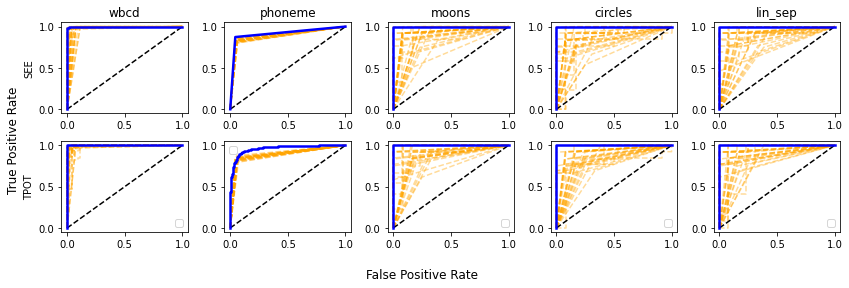

In [122]:
# track auc_scores
import numpy as np

see_auc_scores = [np.zeros(30) for ds in datasets]
tpot_auc_scores = [np.zeros(30) for ds in datasets]

# ROC Curves
# calculate roc curves?
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from see.classifier_helpers import helpers

fig, axs = plt.subplots(2, len(filepath_templates), figsize=(12, 4))

ds_names = ["wbcd", "phoneme", "moons", "circles", "lin_sep"]

automl_names = ["SEE", "TPOT"]

for j, best_data in enumerate(best_matrix):
    ax = axs[0][j]
    fpr_tpr = []
    max_auc_idx = 0
    for i, arr in enumerate(best_data):
        rs = arr[0]
        trained_clf = arr[2]

        # from sklearn.model_selection import train_test_split
        from sklearn.model_selection import cross_val_score
        from sklearn.preprocessing import StandardScaler
        from see.classifier_helpers.fetch_data import fetch_wisconsin_data
        from see.classifier_helpers import helpers

        X = None
        y = None

        if callable(datasets[j]):
            X, y = datasets[j](rs)
        else:
            X, y = datasets[j]

        temp = helpers.generate_train_test_set(
            X, y, test_size=0.25, random_state=rs, stratify=y
        )

        X_test = temp.testing_set.X
        y_test = temp.testing_set.y

        fpr, tpr, auc_score = run_roc_curve(trained_clf, X_test, y_test)
        see_auc_scores[j][i] = auc_score
        if auc_score > see_auc_scores[j][max_auc_idx]:
            max_auc_idx = i
        # roc & auc
        fpr_tpr.append({"fpr": fpr, "tpr": tpr})

    for i, obj in enumerate(fpr_tpr):
        fpr = fpr_tpr[i]["fpr"]
        tpr = fpr_tpr[i]["tpr"]
        if i == max_auc_idx:
            ax.plot(fpr, tpr, linestyle="-", lw=2.5, color="blue", alpha=1, zorder=3)
        else:
            ax.plot(fpr, tpr, linestyle="--", color="orange", alpha=0.4)
        ax.set_title("{}".format(ds_names[j]))

    # roc curve for tpr = fpr
    rand_prob = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob, pos_label=1)
    ax.plot(p_fpr, p_tpr, linestyle="--", color="black")
    if j == 0:
        ax.set_ylabel(automl_names[0])

## TPOT ROC-AUC
import re
import pickle

def extract_random_state(file):
    file = open(file, "r")

    random_state = None

    for line in file:

        pattern = "# random_state int:"

        if re.search(pattern, line):
            random_state = int(line.split(":")[1])

    file.close()
    return random_state


tpot_path_templates = [
    "../10hours_tpot/gen_100_pop_100_breast_cancer/slurm-44903927_{}.out",
    "../10hours_tpot/gen_100_pop_100_phoneme/slurm-44904011_{}.out",
    "../10hours_tpot/moons/slurm-45450742_{}.out",
    "../10hours_tpot/circles/slurm-45450755_{}.out",
    "../10hours_tpot/lin_sep/slurm-45450980_{}.out",
]
tpot_random_states = []
tpot_pickle_templates = [
    "../10hours_tpot/gen_100_pop_100_breast_cancer/cancer_{}.pickle",
    "../10hours_tpot/gen_100_pop_100_phoneme/phoneme_{}.pickle",
    "../10hours_tpot/moons/moons_{}.pickle",
    "../10hours_tpot/circles/circles_{}.pickle",
    "../10hours_tpot/lin_sep/lin_sep_{}.pickle",
]

for j in range(len(tpot_path_templates)):
    temp = []
    path = tpot_path_templates[j]

    for i in range(30):
        temp.append(extract_random_state(path.format(i + 1)))
    tpot_random_states.append(temp)

for j, ax in enumerate(axs[1].ravel()):
    fpr_tpr = []
    max_auc_idx = 0
    trained_pipeline = None
    for i, rs in enumerate(tpot_random_states[j]):
        file_to_load = open(tpot_pickle_templates[j].format(rs), "rb")
        trained_pipeline = pickle.load(file_to_load)
        file_to_load.close()
        # recreate validation set

        ds = datasets[j]
        
        X = None
        y = None
        if callable(ds):
            X, y = ds(rs)
        else:
            X = ds[0]

            y = ds[1]

        # split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=rs, stratify=y
        )

        fpr, tpr, auc_score = run_roc_curve(trained_pipeline, X_test, y_test)
        tpot_auc_scores[j][i] = auc_score
        if auc_score > tpot_auc_scores[j][max_auc_idx]:
            max_auc_idx = i
        # roc & auc
        fpr_tpr.append({"fpr": fpr, "tpr": tpr})

    for i, obj in enumerate(fpr_tpr):
        fpr = obj["fpr"]
        tpr = obj["tpr"]
        if i == max_auc_idx:
            ax.plot(fpr, tpr, linestyle="-", lw=2.5, color="blue", alpha=1, zorder=3)
        else:
            ax.plot(fpr, tpr, linestyle="--", color="orange", alpha=0.4)

    # roc curve for tpr = fpr
    rand_prob = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob, pos_label=1)
    ax.plot(p_fpr, p_tpr, linestyle="--", color="black")
    if j == 0:
        ax.set_ylabel(automl_names[1])

    ax.legend(loc="best")


fig.supxlabel("False Positive Rate")
fig.supylabel("True Positive Rate")
plt.legend(loc="best")


plt.tight_layout()
plt.show()

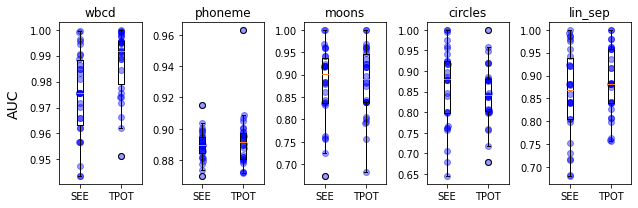

In [116]:
# box plot AUC scores
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, len(filepath_templates), figsize=(9,3))
labels = ['AUC']

for k, ax in enumerate(axs):

    ax.set_title(ds_names[k])

    #ax.set_title(ds_names[i])
    data = [see_auc_scores[k], tpot_auc_scores[k]]
    positions = [1, 5]
    bp1 = ax.boxplot(data, positions=positions, widths=0.6)
    for j in range(len(positions)):
        jitter = np.random.normal(0, 0.02, size=len(data[j]))

        ax.scatter(jitter + positions[j], data[j], alpha=0.4, color='blue') #, label=labels[j])

    ax.set_xticks([1, 5])
    ax.set_xticklabels(['SEE', 'TPOT'])

    if(i == 0):
        print(i)
        # insert SEE Classify performance

    # Handle legend
    if i == 0:
        ax.legend()
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')
        ax.get_legend().remove()
    ax.set_xlim(-1, 7)
    
fig.supylabel('AUC', fontsize=14)
#fig.suptitle('Training and Validation Performance', fontsize=18)
# set axes limits and labels
#plt.xlim(-1,4)
#plt.legend()
plt.tight_layout()

plt.show()

## Training vs Validation

### TPOT Data

In [1]:
tpot_path_templates = [
    "../10hours_tpot/gen_100_pop_100_breast_cancer/slurm-44903927_{}.out",
    "../10hours_tpot/gen_100_pop_100_phoneme/slurm-44904011_{}.out",
    "../10hours_tpot/moons/slurm-45450742_{}.out",
    "../10hours_tpot/circles/slurm-45450755_{}.out",
    "../10hours_tpot/lin_sep/slurm-45450980_{}.out",

]

import re

def extract_train_valid(file):
    file = open(file, "r")

    training_cv_score = None
    validation_score = None

    for line in file:

        pattern = "# random_state int:"

        if re.search(pattern, line):
            random_state = int(line.split(":")[1])


        pattern = "# Average CV score on the training set was:"
        if re.search(pattern, line):
            training_cv_score = float(line.split(":")[1])

        pattern = "# TPOT Test Score:"
        if re.search(pattern, line):
            validation_score = float(line.split(":")[1])
    file.close()
    return training_cv_score, validation_score

import numpy as np

num_trials = 30
tpot_training_performance = np.zeros((len(tpot_path_templates), num_trials))
tpot_validation_performance = np.zeros((len(tpot_path_templates), num_trials))

for row, path in enumerate(tpot_path_templates):
    for col in range(num_trials):
        [training_cv_score, validation_score] = extract_train_valid(path.format(col+1))
        tpot_training_performance[row][col] = training_cv_score
        tpot_validation_performance[row][col] = validation_score
    if(len(np.argwhere(np.isnan(tpot_training_performance[row]))) != 0):
        print("# WARNING: NaN exists in datasets. This notebook has not been set up to handle NaNs...")

In [15]:
# training fitness
training_performance = []
for best_data in best_matrix:
    temp = []
    for arr in best_data:
        temp.append(arr[1])
    training_performance.append(temp)

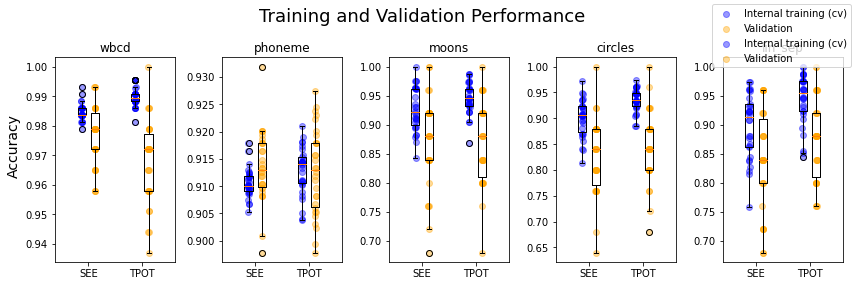

In [53]:
# validation fitness
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, len(filepath_templates), figsize=(12,4))
labels = ['Internal training (cv)', 'Validation']

for i, ax in enumerate(axs.ravel()):
    ax.set_title(ds_names[i])

    # need to convert from fitness to accuracy
    data = [1 - np.array(training_performance[i]), validation_scores[i], tpot_training_performance[i], tpot_validation_performance[i]]
    
    positions=[1,2,5,6]
    
    
    bp1 = ax.boxplot(data, positions=positions, widths=0.6)
    
    colors = ['blue', 'orange']
    for j in range(len(data)):
        jitter = np.random.normal(positions[j], 0.02, size=len(data[j]))
        
        ax.scatter(jitter, data[j], alpha=0.4, label=labels[j % 2], c = colors[j % 2])
    
    ax.set_xticks([1.5, 5.5])
    ax.set_xticklabels(['SEE', 'TPOT'])
    
    # Handle legend
    if i == 0:
        ax.legend()
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')

        ax.get_legend().remove()
    ax.set_xlim(-1, 8)
#     ax.set_ylim([0.63, 1.04])

fig.supylabel('Accuracy', fontsize=14)
fig.suptitle('Training and Validation Performance', fontsize=18)
# set axes limits and labels
#plt.xlim(-1,4)
#plt.legend()
plt.tight_layout()

plt.show()

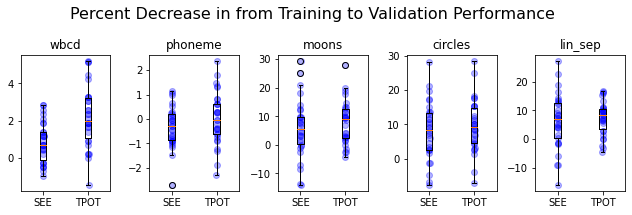

In [83]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, len(filepath_templates), figsize=(9,3))

for i, ax in enumerate(axs.ravel()):
    see_y = ((1 - np.array(training_performance[i])) - validation_scores[i])/(1 - np.array(training_performance[i])) * 100
    tpot_y = (tpot_training_performance[i] - tpot_validation_performance[i])/(tpot_training_performance[i]) * 100
    
    data = [see_y, tpot_y]
    positions = [1, 5]
    bp1 = ax.boxplot(data, positions=positions, widths=0.6)
    
    jitter = np.random.normal(0, 0.02, size=len(see_y))

    for j in range(len(data)):
        ax.scatter(jitter + positions[j], data[j], alpha=0.3, color='blue')
    
    ax.set_xticks([1, 5])
    ax.set_xticklabels(['SEE', 'TPOT'])
    ax.set_title(ds_names[i])

    ax.set_xlim(-1, 7)

# plt.xlim(-1,4)
# plt.legend()
# plt.tight_layout()

# plt.show()

# y = (training_performance - validation_performance)/training_performance * 100
# plt.boxplot(y)
# jitter = np.random.normal(1, 0.02, size=len(y))
# plt.scatter(jitter, (training_performance - validation_performance)/training_performance * 100, alpha=0.4)
fig.suptitle('Percent Decrease in from Training to Validation Performance', fontsize=16)
fig.tight_layout()